<a href="https://colab.research.google.com/github/yashika-ishi/CSI_Assignments_2025/blob/main/Week5_Assignment_House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Celebal Technologies**
*Celebel Summer Internship (CSI)*
<br>
WEEK-5
<br>
Assignment : House Price Prediction
<br>
Description:
<br>
1. Data Preprocessing and feature engineering
    <br>Resources :<br>
    https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data

 DATASET:  (https://github.com/yashika-ishi/CSI_Assignments_2025/tree/main/house-prices-advanced-regression-techniques)

***By: Yashika***

# **Step 1: Importing Libraries**

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import various regression models
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

# For preprocessing steps
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from scipy.stats import skew

# **Step 2: Load the Dataset**

In [44]:
# Global Display Settings for Pandas DataFrames
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# Set up matplotlib for better plots
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 12

print("--- Starting House Price Prediction Script with Multiple Regression Models ---")

# Load Data
print("\nLoading Data...")
try:
    train_df = pd.read_csv('/content/drive/MyDrive/CSI DATASETS/house-prices-advanced-regression-techniques/train.csv')
    test_df = pd.read_csv('/content/drive/MyDrive/CSI DATASETS/house-prices-advanced-regression-techniques/test.csv')
    print(f"Successfully loaded train data with shape: {train_df.shape}")
    print(f"Successfully loaded test data with shape: {test_df.shape}")

    print("\n--- Train Data Head (first 5 rows) ---")
    print(train_df.head())
    print("\n--- Train Data Info (summary of columns and types) ---")
    train_df.info()

except FileNotFoundError:
    print("Error: 'train.csv' or 'test.csv' not found.")
    exit()

# Store 'Id' column from the test set for the final submission file.
test_ids = test_df['Id']
train_df = train_df.drop('Id', axis=1)
test_df = test_df.drop('Id', axis=1)

--- Starting House Price Prediction Script with Multiple Regression Models ---

Loading Data...
Successfully loaded train data with shape: (1460, 81)
Successfully loaded test data with shape: (1459, 80)

--- Train Data Head (first 5 rows) ---
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPor

# **Step 3: Target Variable Transformation**


 Transforming Target Variable (SalePrice)...
SalePrice has been log-transformed.


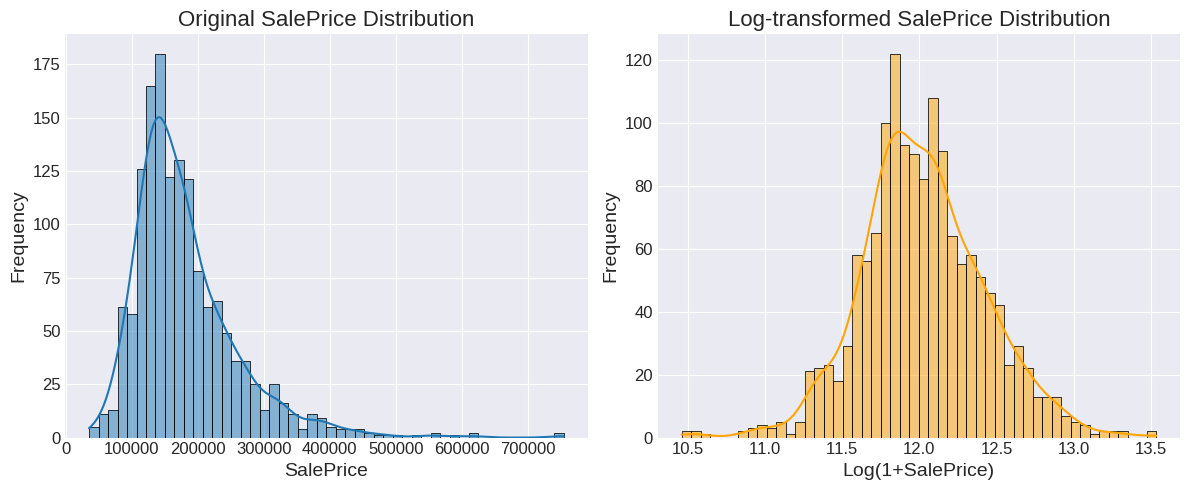

In [45]:
# Log transforming SalePrice
print("\n Transforming Target Variable (SalePrice)...")

# Plot for BEFORE transformation
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(train_df['SalePrice'], kde=True, bins=50)
plt.title('Original SalePrice Distribution')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')

train_df['SalePrice'] = np.log1p(train_df['SalePrice'])
print("SalePrice has been log-transformed.")
#Yashika

# Plot for AFTER transformation
plt.subplot(1, 2, 2)
sns.histplot(train_df['SalePrice'], kde=True, bins=50, color='orange')
plt.title('Log-transformed SalePrice Distribution')
plt.xlabel('Log(1+SalePrice)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# **Step 4: Combine Data for Consistent Preprocessing**

In [46]:
print("\nCombining Train and Test Data for Consistent Preprocessing...")
combined_df = pd.concat([train_df.drop('SalePrice', axis=1), test_df], ignore_index=True)
print(f"Combined data shape: {combined_df.shape}")
print("\n--- Combined Data Head (first 5 rows) ---")
print(combined_df.head())


Combining Train and Test Data for Consistent Preprocessing...
Combined data shape: (2919, 79)

--- Combined Data Head (first 5 rows) ---
   MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea PoolQC Fence MiscFeature  MiscVal  MoSold  YrSold SaleT

# **Step 5: Data Cleaning**

# **Step 5.1: Handling Missing Values**

Handling Missing Values...

--- 34 Missing Values Before Imputation (Top 20) ---
PoolQC          2909
MiscFeature     2814
Alley           2721
Fence           2348
MasVnrType      1766
FireplaceQu     1420
LotFrontage      486
GarageFinish     159
GarageQual       159
GarageCond       159
GarageYrBlt      159
GarageType       157
BsmtExposure      82
BsmtCond          82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrArea        23
MSZoning           4
BsmtFullBath       2


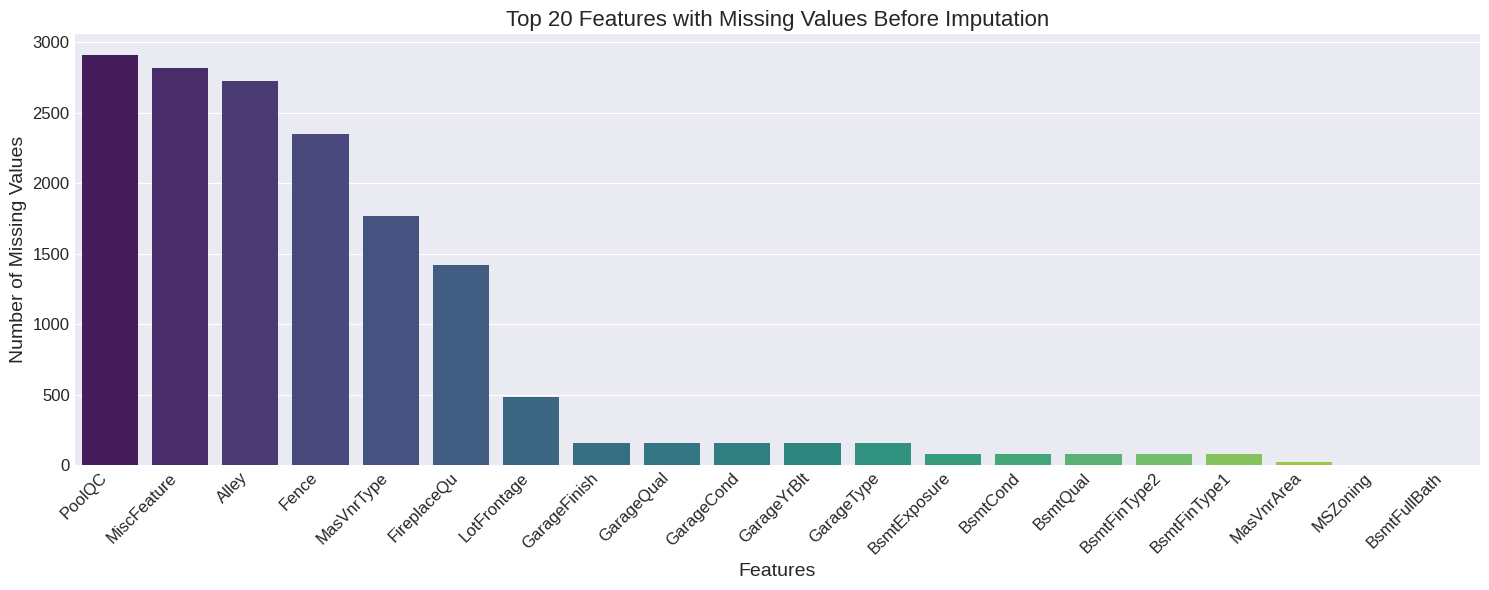

Imputing 15 categorical 'None' features with 'None' string.
Imputing 10 numerical 'None' features with 0.
Imputing 'Electrical' with its mode (most frequent value).
Imputing 7 other categorical features with their respective modes.
Imputing 'LotFrontage' with the median 'LotFrontage' per 'Neighborhood'.
Converting 'MSSubClass' to categorical (object) type.
Performing final check for any remaining missing values...
All missing values have been handled.

--- No missing values remaining after imputation. Data is clean! ---


In [47]:
print("Handling Missing Values...")
# Display missing values before handling
missing_initial = combined_df.isnull().sum()
missing_initial = missing_initial[missing_initial > 0].sort_values(ascending=False)
if not missing_initial.empty:
    print(f"\n--- {len(missing_initial)} Missing Values Before Imputation (Top 20) ---")
    print(missing_initial.head(20).to_string())
    plt.figure(figsize=(15, 6))
    # Corrected line to address FutureWarning
    sns.barplot(x=missing_initial.index[:20], y=missing_initial.values[:20], hue=missing_initial.index[:20], palette='viridis', legend=False)
    plt.title('Top 20 Features with Missing Values Before Imputation')
    plt.xlabel('Features')
    plt.ylabel('Number of Missing Values')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("\nNo missing values found initially in combined_df (highly unlikely for this dataset).")

# Features where 'NA' means 'None' (absence of the feature) - categorical
none_cols = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu',
             'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
             'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
             'MasVnrType']
print(f"Imputing {len(none_cols)} categorical 'None' features with 'None' string.")
for col in none_cols:
    combined_df[col] = combined_df[col].fillna('None')

# Features where 'NA' means 0 (absence of area/count) - numerical
zero_cols = ['GarageYrBlt', 'GarageArea', 'GarageCars', 'BsmtFinSF1', 'BsmtFinSF2',
             'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF', 'TotalBsmtSF', 'MasVnrArea']
print(f"Imputing {len(zero_cols)} numerical 'None' features with 0.")
for col in zero_cols:
    combined_df[col] = combined_df[col].fillna(0)

# Electrical: Fill with most frequent value (mode)
print("Imputing 'Electrical' with its mode (most frequent value).")
combined_df['Electrical'] = combined_df['Electrical'].fillna(combined_df['Electrical'].mode()[0])

# MSZoning, Utilities, Functional, SaleType, KitchenQual, Exterior1st, Exterior2nd: Fill with mode
mode_impute_cols = ['MSZoning', 'Utilities', 'Functional', 'SaleType', 'KitchenQual', 'Exterior1st', 'Exterior2nd']
print(f"Imputing {len(mode_impute_cols)} other categorical features with their respective modes.")
for col in mode_impute_cols:
    combined_df[col] = combined_df[col].fillna(combined_df[col].mode()[0])

# LotFrontage: Fill with median based on neighborhood
print("Imputing 'LotFrontage' with the median 'LotFrontage' per 'Neighborhood'.")
combined_df['LotFrontage'] = combined_df.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

# MSSubClass: Convert to object type (categorical)
print("Converting 'MSSubClass' to categorical (object) type.")
combined_df['MSSubClass'] = combined_df['MSSubClass'].astype(str)

# Final check for any remaining missing values (should be none or very few now)
print("Performing final check for any remaining missing values...")
for col in combined_df.columns:
    if combined_df[col].isnull().any():
        if combined_df[col].dtype == 'object':
            combined_df[col] = combined_df[col].fillna(combined_df[col].mode()[0])
        else:
            combined_df[col] = combined_df[col].fillna(combined_df[col].median())
print("All missing values have been handled.")

# Display missing values AFTER handling
missing_after_imputation = combined_df.isnull().sum()
missing_after_imputation = missing_after_imputation[missing_after_imputation > 0]
if not missing_after_imputation.empty:
    print("\n--- Missing Values AFTER Imputation (This should ideally be empty) ---")
    print(missing_after_imputation.to_string())
else:
    print("\n--- No missing values remaining after imputation. Data is clean! ---")

# **Step 5.2: Outlier Removal**

 Outlier Removal...


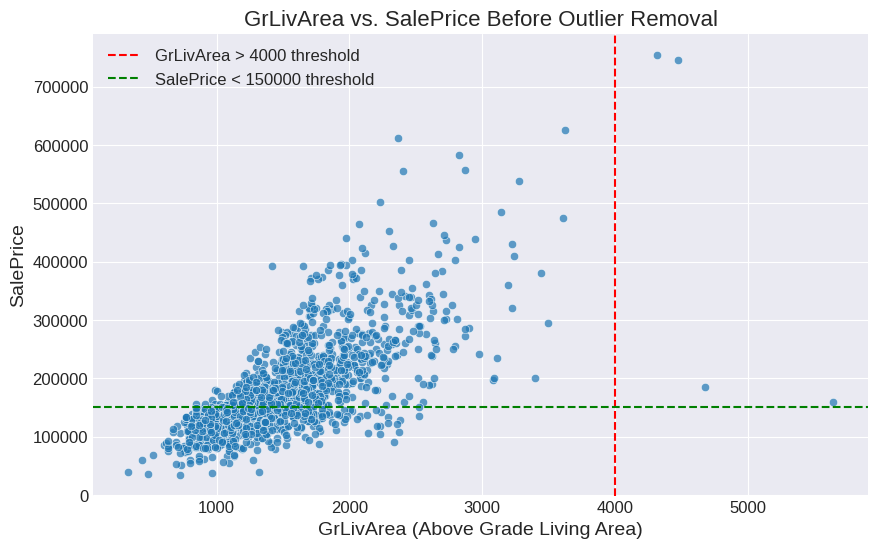

    Identified 0 outliers based on GrLivArea and SalePrice criteria.
    Specific outliers (large GrLivArea with low SalePrice) removed.


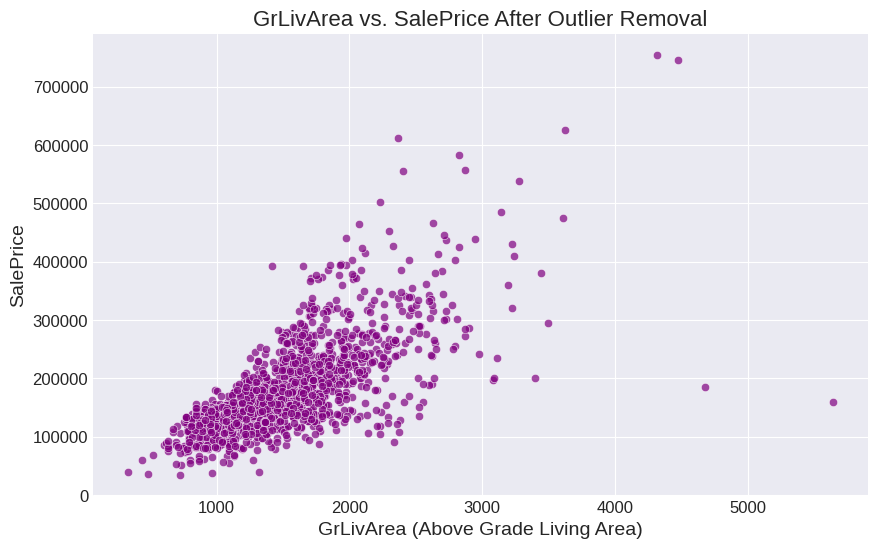

New train data shape after outlier removal: (1460, 80)
New combined data shape after outlier removal: (2919, 79)


In [48]:
print(" Outlier Removal...")
# Original distribution before removing outliers
plt.figure(figsize=(10, 6))
sns.scatterplot(x=combined_df['GrLivArea'], y=np.expm1(train_df['SalePrice']), alpha=0.7) # Use expm1 to get original SalePrice scale
plt.title('GrLivArea vs. SalePrice Before Outlier Removal')
plt.xlabel('GrLivArea (Above Grade Living Area)')
plt.ylabel('SalePrice')
plt.axvline(x=4000, color='r', linestyle='--', label='GrLivArea > 4000 threshold')
plt.axhline(y=150000, color='g', linestyle='--', label='SalePrice < 150000 threshold')
plt.legend()
plt.show()

# Remove known outliers
outlier_indices_in_combined = combined_df[(combined_df['GrLivArea'] > 4000) &
                                          (np.expm1(train_df['SalePrice']) < 150000)].index
print(f"    Identified {len(outlier_indices_in_combined)} outliers based on GrLivArea and SalePrice criteria.")

combined_df = combined_df.drop(outlier_indices_in_combined)
# Adjust train_df to remove corresponding rows
train_df = train_df.drop(train_df.index.intersection(outlier_indices_in_combined))
print("    Specific outliers (large GrLivArea with low SalePrice) removed.")

# Display distribution AFTER removing outliers
plt.figure(figsize=(10, 6))
sns.scatterplot(x=combined_df['GrLivArea'], y=np.expm1(train_df['SalePrice']), alpha=0.7, color='purple')
plt.title('GrLivArea vs. SalePrice After Outlier Removal')
plt.xlabel('GrLivArea (Above Grade Living Area)')
plt.ylabel('SalePrice')
plt.show()

print(f"New train data shape after outlier removal: {train_df.shape}")
print(f"New combined data shape after outlier removal: {combined_df.shape}")

# **Step 6. Feature Engineering**

In [49]:
print(" Feature Engineering...")
# Creating new, more informative features from existing ones.
combined_df['TotalSF'] = combined_df['TotalBsmtSF'] + combined_df['1stFlrSF'] + combined_df['2ndFlrSF']
combined_df['TotalBath'] = combined_df['FullBath'] + (0.5 * combined_df['HalfBath']) + \
                          combined_df['BsmtFullBath'] + (0.5 * combined_df['BsmtHalfBath'])
combined_df['YrBltAndRemod'] = combined_df['YearBuilt'] + combined_df['YearRemodAdd']

# Binary features (presence/absence of amenities)
combined_df['HasPool'] = combined_df['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
combined_df['HasGarage'] = combined_df['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
combined_df['HasBsmt'] = combined_df['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
combined_df['HasFireplace'] = combined_df['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)
combined_df['HasPorch'] = (combined_df['OpenPorchSF'] + combined_df['3SsnPorch'] +
                           combined_df['EnclosedPorch'] + combined_df['ScreenPorch'] +
                           combined_df['WoodDeckSF']).apply(lambda x: 1 if x > 0 else 0)

# Age-related features
combined_df['AgeAtSale'] = combined_df['YrSold'] - combined_df['YearBuilt']
combined_df['AgeSinceRemodel'] = combined_df['YrSold'] - combined_df['YearRemodAdd']

# Interaction features (e.g., quality * size)
combined_df['OverallQual_GrLivArea'] = combined_df['OverallQual'] * combined_df['GrLivArea']
combined_df['OverallQual_TotalSF'] = combined_df['OverallQual'] * combined_df['TotalSF']
print("    New features created.")
print("\n--- Combined Data Head after Feature Engineering (showing some new columns) ---")
print(combined_df[['TotalSF', 'TotalBath', 'AgeAtSale', 'OverallQual_GrLivArea', 'HasPool']].head())


 Feature Engineering...
    New features created.

--- Combined Data Head after Feature Engineering (showing some new columns) ---
   TotalSF  TotalBath  AgeAtSale  OverallQual_GrLivArea  HasPool
0   2566.0        3.5          5                  11970        0
1   2524.0        2.5         31                   7572        0
2   2706.0        3.5          7                  12502        0
3   2473.0        2.0         91                  12019        0
4   3343.0        3.5          8                  17584        0


# **Step 6.1: Numerical Feature Transformation (Skewness Handling)**

Transforming Skewed Numerical Features...
Identified 25 highly skewed numerical features for transformation (skewness > 0.75):
['MiscVal', 'PoolArea', 'HasPool', 'LotArea', 'LowQualFinSF', '3SsnPorch', 'KitchenAbvGr', 'BsmtFinSF2', 'EnclosedPorch', 'ScreenPorch', 'BsmtHalfBath', 'MasVnrArea', 'OpenPorchSF', 'OverallQual_TotalSF', 'WoodDeckSF', 'OverallQual_GrLivArea', 'TotalSF', 'LotFrontage', '1stFlrSF', 'BsmtFinSF1', 'GrLivArea', 'TotalBsmtSF', 'BsmtUnfSF', '2ndFlrSF', 'TotRmsAbvGrd']


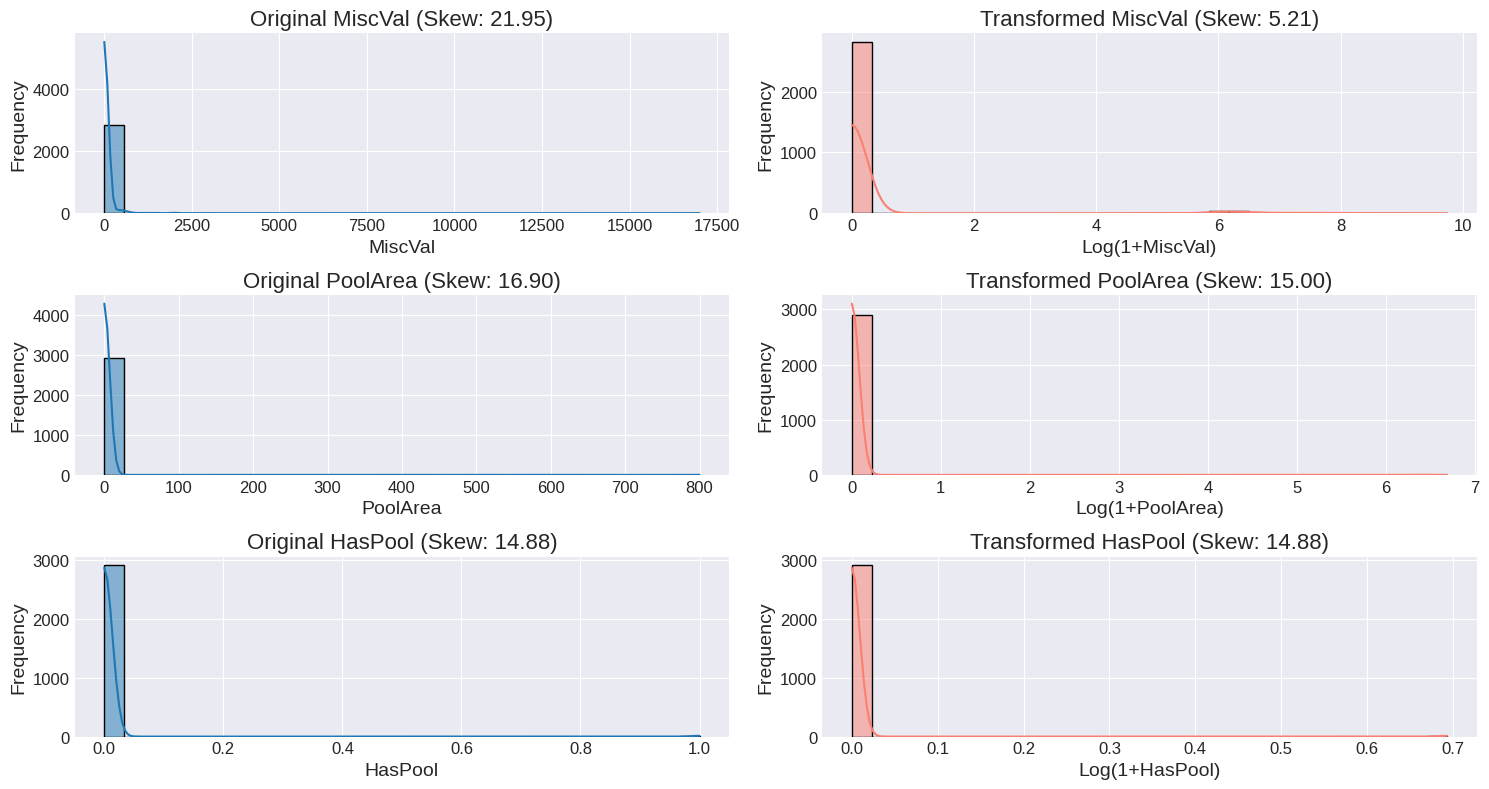

 Log1p transformation applied to 25 skewed numerical features.


In [50]:
print("Transforming Skewed Numerical Features...")
numerical_features = combined_df.select_dtypes(include=np.number).columns.tolist()
skewed_features_series = combined_df[numerical_features].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewed_features_to_transform = skewed_features_series[skewed_features_series > 0.75].index # Threshold for skewness

print(f"Identified {len(skewed_features_to_transform)} highly skewed numerical features for transformation (skewness > 0.75):")
print(skewed_features_to_transform.tolist())

# Plot distributions of a few highly skewed features before and after transformation
if len(skewed_features_to_transform) > 0:
    plt.figure(figsize=(15, 8))
    features_to_plot = skewed_features_to_transform[:3]
    for i, feature in enumerate(features_to_plot):
        plt.subplot(len(features_to_plot), 2, 2*i + 1)
        sns.histplot(combined_df[feature], kde=True, bins=30)
        plt.title(f'Original {feature} (Skew: {skewed_features_series[feature]:.2f})')
        plt.xlabel(feature)
        plt.ylabel('Frequency')

        combined_df[feature] = np.log1p(combined_df[feature]) # Apply transformation

        plt.subplot(len(features_to_plot), 2, 2*i + 2)
        sns.histplot(combined_df[feature], kde=True, bins=30, color='salmon')
        plt.title(f'Transformed {feature} (Skew: {skew(combined_df[feature].dropna()):.2f})')
        plt.xlabel(f'Log(1+{feature})')
        plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

print(f" Log1p transformation applied to {len(skewed_features_to_transform)} skewed numerical features.")

# **Step 6.2: Categorical Feature Encoding (One-Hot Encoding)**

In [51]:
# Categorical Feature Encoding (One-Hot Encoding)
print("One-Hot Encoding for Categorical Features...")
categorical_features = combined_df.select_dtypes(include='object').columns.tolist()
print(f"    Identified {len(categorical_features)} categorical features for one-hot encoding: {categorical_features}")

# Perform one-hot encoding
initial_cols = combined_df.shape[1]
combined_df = pd.get_dummies(combined_df, columns=categorical_features, drop_first=True)
final_cols = combined_df.shape[1]
print(f"    Categorical features one-hot encoded. Number of columns changed from {initial_cols} to {final_cols}.")
print(f"Final combined data shape after all preprocessing: {combined_df.shape}")
print("\n--- Combined Data Head after One-Hot Encoding (showing some new dummy columns) ---")
print(combined_df.select_dtypes(include=np.number).head()) # Show numerical columns for a cleaner head view

One-Hot Encoding for Categorical Features...
    Identified 44 categorical features for one-hot encoding: ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
    Categorical features one-hot encoded. Number of columns changed from 91 to 285.
Final combined data shape after all preprocessing: (2919, 285)

--- Combined Data Head after One-Hot Encoding (showing some new dummy columns) ---
   LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  YearRem

# **Step 7:Split Data Back into Training and Testing Sets**

In [52]:
print("\nSplitting Data Back into Training (X, y) and Test (X_test) sets...")
X = combined_df[:len(train_df)]
y = train_df['SalePrice'] # Our log-transformed SalePrice
X_test = combined_df[len(train_df):]

print(f"X (training features) shape: {X.shape}")
print(f"y (training target) shape: {y.shape}")
print(f"X_test (test features) shape: {X_test.shape}")

# Align Columns Between X and X_test
print("\nAligning Columns between Training and Test Sets...")
train_cols = set(X.columns)
test_cols = set(X_test.columns)

missing_in_test = list(train_cols - test_cols)
if missing_in_test:
    print(f"    Adding {len(missing_in_test)} columns to X_test that were in X but not in X_test: {missing_in_test}")
    for col in missing_in_test:
        X_test[col] = 0 # Add columns that are in train but not in test

missing_in_train = list(test_cols - train_cols)
if missing_in_train:
    print(f"    Adding {len(missing_in_train)} columns to X that were in X_test but not in X: {missing_in_train} (rare)")
    for col in missing_in_train:
        X[col] = 0 # Add columns that are in test but not in train (rare but good for robustness)

X_test = X_test[X.columns] # Ensure X_test columns are in the same order as X's columns
print("Columns aligned and ordered for both training and test sets.")
print(f"Final X_test shape after alignment: {X_test.shape}")



Splitting Data Back into Training (X, y) and Test (X_test) sets...
X (training features) shape: (1460, 285)
y (training target) shape: (1460,)
X_test (test features) shape: (1459, 285)

Aligning Columns between Training and Test Sets...
Columns aligned and ordered for both training and test sets.
Final X_test shape after alignment: (1459, 285)


# **Step 8:Model Training & Prediction for Various Regression Techniques**
1. LinearRegression
2. RidgeRegression
3. LassoRegression
4. ElasticNetRegression
5. DecisionTreeRegressor
6. RandomForestRegressor
7. SVR_RBF

In [53]:
print("\nTraining and Predicting with various Regression Models...")

# Dictionary to store models for easier iteration
models = {
    "LinearRegression": LinearRegression(),
    "RidgeRegression": Ridge(alpha=10.0, random_state=42), # Alpha is regularization strength
    "LassoRegression": Lasso(alpha=0.0005, random_state=42, max_iter=5000), # Alpha chosen often for this dataset, increased max_iter
    "ElasticNetRegression": ElasticNet(alpha=0.001, l1_ratio=0.5, random_state=42, max_iter=5000), # l1_ratio controls mix of L1/L2
    "DecisionTreeRegressor": DecisionTreeRegressor(max_depth=8, random_state=42), # Limiting depth to prevent severe overfitting
    "RandomForestRegressor": RandomForestRegressor(n_estimators=1000, max_depth=10, min_samples_leaf=5, random_state=42, n_jobs=-1),
    "SVR_RBF": SVR(kernel='rbf', C=100, epsilon=0.1) # SVR is computationally intensive, scaling is vital
}

# Scaling of features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)
print("Features scaled for linear and SVM models.")

# Loop through each model, train, predict, and save submission
for model_name, model in models.items():
    print(f"\n--- Training {model_name} ---")

    # Determine which data to use (scaled or unscaled) based on model type
    current_X = X
    current_X_test = X_test
    if model_name in ["LinearRegression", "RidgeRegression", "LassoRegression", "ElasticNetRegression", "SVR_RBF"]:
        current_X = X_scaled
        current_X_test = X_test_scaled
        print(f"  Using scaled data for {model_name}.")
    else:
        print(f"  Using unscaled data for {model_name} (tree-based models are less sensitive to scaling).")

    # Fit the model
    try:
        model.fit(current_X, y)
        print(f"  {model_name} training complete.")

        # Make predictions
        predictions_log = model.predict(current_X_test)
        predictions_actual = np.expm1(predictions_log) # Inverse transform to original price scale

        # Ensure no negative predictions
        predictions_actual[predictions_actual < 0] = 0

        # Create and save submission file for this model
        submission_df = pd.DataFrame({'Id': test_ids, 'SalePrice': predictions_actual})
        submission_filename = f'submission_{model_name.lower()}.csv'
        submission_df.to_csv(submission_filename, index=False)
        print(f"  Predictions for {model_name} saved to '{submission_filename}'.")
        print(f"  Head of {submission_filename}:\n{submission_df.head()}")

    except Exception as e:
        print(f"  Error training or predicting with {model_name}: {e}")
        print(f"  Skipping submission for {model_name}.")



Training and Predicting with various Regression Models...
Features scaled for linear and SVM models.

--- Training LinearRegression ---
  Using scaled data for LinearRegression.
  LinearRegression training complete.
  Predictions for LinearRegression saved to 'submission_linearregression.csv'.
  Head of submission_linearregression.csv:
     Id      SalePrice
0  1461  118335.085411
1  1462  160156.362884
2  1463  184048.761702
3  1464  200848.155876
4  1465  199470.310460

--- Training RidgeRegression ---
  Using scaled data for RidgeRegression.
  RidgeRegression training complete.
  Predictions for RidgeRegression saved to 'submission_ridgeregression.csv'.
  Head of submission_ridgeregression.csv:
     Id      SalePrice
0  1461  117016.236178
1  1462  154019.984195
2  1463  179983.823974
3  1464  198891.839621
4  1465  200774.430674

--- Training LassoRegression ---
  Using scaled data for LassoRegression.
  LassoRegression training complete.
  Predictions for LassoRegression saved to